# 🧪 Diabetes Risk Classifier

Este notebook utiliza machine learning con **Scikit-Learn** para predecir el riesgo de diabetes usando el dataset Pima Indians. Incluye evaluación cruzada, métricas y visualizaciones como curva ROC y matriz de confusión.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Cargar dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Variables independientes y dependiente
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar conjuntos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Validación cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Validación cruzada (5-fold) - Accuracy media: {cv_scores.mean():.3f}")
print(f"Accuracy por partición: {cv_scores}")


Validación cruzada (5-fold) - Accuracy media: 0.766
Accuracy por partición: [0.75324675 0.74675325 0.74025974 0.83660131 0.75163399]


In [14]:
# Predicción y evaluación
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


[[78 21]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

ROC AUC: 0.703030303030303


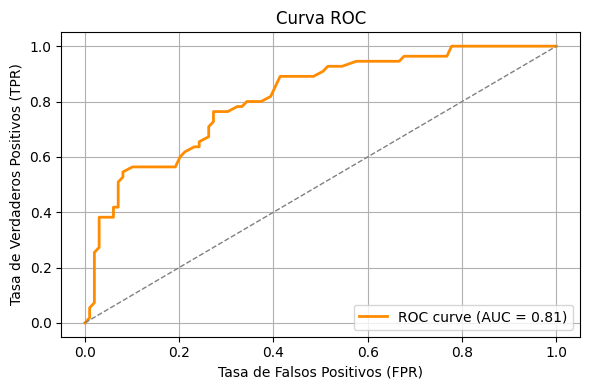

In [15]:
# Curva ROC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


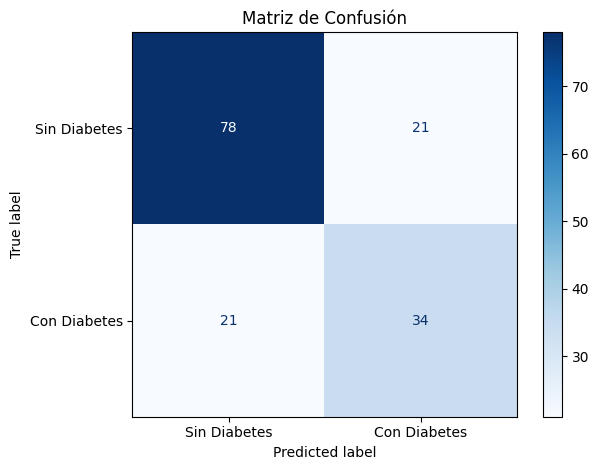

In [16]:
# Matriz de confusión visual
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Sin Diabetes", "Con Diabetes"], cmap='Blues')
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()
